In [2]:
def fix_data_types(df, dataset_name):
    """Fix data type inconsistencies for specific columns"""
    df_fixed = df.copy()
    
    # Define columns that should be numeric
    numeric_columns_to_fix = ['humidity', 'wind_speed', 'pressure']
    
    print(f"\n=== FIXING DATA TYPES FOR {dataset_name} ===")
    
    for col in numeric_columns_to_fix:
        if col in df_fixed.columns:
            print(f"\nProcessing {col}:")
            print(f"Original dtype: {df_fixed[col].dtype}")
            
            # Check for non-numeric values before conversion
            if df_fixed[col].dtype == 'object':
                # Display unique non-numeric values
                try:
                    # Try to convert to numeric and see what fails
                    numeric_conversion = pd.to_numeric(df_fixed[col], errors='coerce')
                    non_numeric_mask = pd.isna(numeric_conversion) & df_fixed[col].notna()
                    
                    if non_numeric_mask.any():
                        print(f"Non-numeric values found in {col}:")
                        non_numeric_values = df_fixed.loc[non_numeric_mask, col].value_counts()
                        print(non_numeric_values.head(10))
                        
                        # Handle common non-numeric patterns
                        df_fixed[col] = df_fixed[col].astype(str)
                        
                        # Remove common problematic characters
                        df_fixed[col] = df_fixed[col].str.replace(r'[^\d.-]', '', regex=True)
                        df_fixed[col] = df_fixed[col].str.strip()
                        
                        # Handle empty strings
                        df_fixed[col] = df_fixed[col].replace('', np.nan)
                        df_fixed[col] = df_fixed[col].replace('nan', np.nan)
                        
                    # Convert to numeric
                    df_fixed[col] = pd.to_numeric(df_fixed[col], errors='coerce')
                    
                    print(f"Converted dtype: {df_fixed[col].dtype}")
                    print(f"Missing values after conversion: {df_fixed[col].isnull().sum()}")
                    print(f"Valid numeric values: {df_fixed[col].notna().sum()}")
                    
                    # Basic statistics for converted column
                    if df_fixed[col].notna().any():
                        print(f"Min: {df_fixed[col].min():.3f}")
                        print(f"Max: {df_fixed[col].max():.3f}")
                        print(f"Mean: {df_fixed[col].mean():.3f}")
                        
                except Exception as e:
                    print(f"Error converting {col}: {str(e)}")
            else:
                print(f"{col} is already numeric type: {df_fixed[col].dtype}")
    
    return df_fixed

In [3]:
features_to_drop = [
        'id', 'temperature', 'humidity', 'maintenance_count', 'voltage',
        'module_temperature', 'pressure', 'string_id', 'error_code',
        'installation_type', 'power_output', 'temp_difference',
        'temp_coefficient_effect', 'expected_irradiance_clean', 'age_category',
        'environmental_stress', 'effective_module_temp', 'power_output_log',
        'temp_difference_robust', 'performance_deviation', 'efficiency_ratio',
        'mean', 'std', 'min', 'max', 'power_output_string_mean',
        'power_output_string_std', 'power_output_string_min',
        'power_output_string_max', 'power_vs_string_mean', 'error_indicator',
        'consecutive_errors', 'anomaly_score', 'operating_regime',
        'regime_expected_power', 'regime_performance_deviation'
    ]
data_path="dataset/train.csv"

In [4]:
print("Loading raw data...")
df_raw = pd.read_csv(data_path)
print(f"Raw dataset shape: {df_raw.shape}")
print(f"Missing values in raw data:\n{df_raw.isnull().sum()[df_raw.isnull().sum() > 0]}")

Loading raw data...
Raw dataset shape: (20000, 17)
Missing values in raw data:
temperature           1001
irradiance             987
panel_age             1011
maintenance_count     1027
soiling_ratio         1010
voltage                993
current                977
module_temperature     978
cloud_coverage        1010
error_code            5912
installation_type     5028
dtype: int64


In [5]:
# Step 1: Fix data types BEFORE imputation
print("\nStep 1: Fixing data types...")
df_fixed = fix_data_types(df_raw, "TRAINING DATA")

# Verify the fixes
print("\n=== DATA TYPE VERIFICATION ===")
print("Data types after fixing:")
for col in ['humidity', 'wind_speed', 'pressure']:
    if col in df_fixed.columns:
        print(f"{col}: {df_fixed[col].dtype}")


Step 1: Fixing data types...

=== FIXING DATA TYPES FOR TRAINING DATA ===

Processing humidity:
Original dtype: object
Non-numeric values found in humidity:
humidity
unknown    50
error      40
badval     37
Name: count, dtype: int64
Converted dtype: float64
Missing values after conversion: 127
Valid numeric values: 19873
Min: 0.011
Max: 99.995
Mean: 50.066

Processing wind_speed:
Original dtype: object
Non-numeric values found in wind_speed:
wind_speed
badval     42
error      41
unknown    36
Name: count, dtype: int64
Converted dtype: float64
Missing values after conversion: 119
Valid numeric values: 19881
Min: 0.001
Max: 14.999
Mean: 7.413

Processing pressure:
Original dtype: object
Non-numeric values found in pressure:
pressure
unknown    46
error      45
badval     44
Name: count, dtype: int64
Converted dtype: float64
Missing values after conversion: 135
Valid numeric values: 19865
Min: 970.087
Max: 1052.866
Mean: 1012.981

=== DATA TYPE VERIFICATION ===
Data types after fixing:

In [6]:
# Step 2: Initialize and apply imputation pipeline (WITHOUT feature creation)
print("\nStep 2: Applying imputation pipeline...")
imputer = ImputationPipeline()
df_imputed = imputer.fit_transform(df_fixed)

print(f"Dataset shape after imputation: {df_imputed.shape}")
remaining_missing = df_imputed.isnull().sum().sum()
print(f"Remaining missing values after imputation: {remaining_missing}")


Step 2: Applying imputation pipeline...
Dataset shape after imputation: (20000, 17)
Remaining missing values after imputation: 0


In [7]:
df_imputed

,id,temperature,irradiance,humidity,panel_age,maintenance_count,soiling_ratio,voltage,current,module_temperature,cloud_coverage,wind_speed,pressure,string_id,error_code,installation_type,efficiency
0,0,7.817315,576.179270,41.243087,32.135501,4.0,0.803199,37.403527,1.963787,13.691147,62.494044,12.824912,1018.866505,A1,NO_ERROR,tracking,0.562096
1,1,24.785727,240.003973,1.359648,19.977460,8.0,0.479456,21.843315,0.241473,27.545096,43.851238,12.012044,1025.623854,D4,E00,dual-axis,0.396447
2,2,46.652695,687.612799,91.265368,1.496401,4.0,0.822398,48.222882,4.191800,43.363708,51.311554,1.814400,1010.922654,C3,E00,tracking,0.573776
3,3,53.339567,735.141179,96.190955,18.491582,3.0,0.837529,46.295748,0.960567,57.720436,67.361473,8.736259,1021.846663,A1,NO_ERROR,dual-axis,0.629009
4,4,5.575374,12.241203,27.495073,30.722697,6.0,0.551833,0.000000,0.898062,6.786263,3.632000,0.522684,1008.555958,B2,E00,fixed,0.341874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19995,16.868428,618.576156,93.530318,14.393967,3.0,0.738911,12.147711,3.005355,26.206810,1.733013,12.594122,1018.374467,B2,E02,tracking,0.664907
19996,19996,53.415061,296.970303,93.985714,25.997012,2.0,0.513061,0.000000,0.532119,65.000000,64.558667,0.976991,1016.081102,D4,E00,fixed,0.354070
19997,19997,2.442727,660.328019,37.968918,32.818396,9.0,0.548602,13.047950,4.075498,11.584869,57.730134,4.750937,1009.684461,D4,NO_ERROR,tracking,0.419734
19998,19998,16.858212,632.760700,43.014702,19.063517,4.0,0.701482,0.000000,1.068906,21.149351,78.123689,11.304158,1006.673875,A1,E00,tracking,0.661963


In [9]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans

In [12]:
df_engineered = df_imputed.copy()

In [15]:
df_engineered['power_output'] = df_engineered['voltage'] * df_engineered['current']

df_engineered['temp_difference'] = (df_engineered['module_temperature'] - df_engineered['temperature'])

df_engineered['irradiance_normalized'] = df_engineered['irradiance'] / 1000

df_engineered['temp_coefficient_effect'] = 1 - 0.004 * (df_engineered['temperature'] - 25)

In [16]:
df_engineered['expected_irradiance_clean'] = (df_engineered['irradiance'] / df_engineered['soiling_ratio'])

df_engineered['soiling_loss'] = (df_engineered['expected_irradiance_clean'] -  df_engineered['irradiance'])

In [17]:
df_engineered['irradiance_cloud_ratio'] = (df_engineered['irradiance'] /  (100 - df_engineered['cloud_coverage'] + 1))

In [18]:
df_engineered['age_degradation_factor'] = 1 - (0.006 * df_engineered['panel_age'])

df_engineered['age_category'] = pd.cut(df_engineered['panel_age'], 
                                        bins=[0, 2, 5, 10, float('inf')],
                                        labels=['New', 'Young', 'Mature', 'Old'])

In [19]:
df_engineered['maintenance_frequency'] = (df_engineered['maintenance_count'] / (df_engineered['panel_age'] + 1))


In [20]:
df_engineered['wind_cooling_effect'] = df_engineered['wind_speed'] * 2  

df_engineered['effective_module_temp'] = (df_engineered['module_temperature'] - 
                                            df_engineered['wind_cooling_effect'])

In [21]:
df_engineered['installation_type_tracking'] = (df_engineered['installation_type'] == 'tracking').astype(int)

In [22]:
df_engineered

,id,temperature,irradiance,humidity,panel_age,maintenance_count,soiling_ratio,voltage,current,module_temperature,...,temp_coefficient_effect,expected_irradiance_clean,soiling_loss,irradiance_cloud_ratio,age_degradation_factor,age_category,maintenance_frequency,wind_cooling_effect,effective_module_temp,installation_type_tracking
0,0,7.817315,576.179270,41.243087,32.135501,4.0,0.803199,37.403527,1.963787,13.691147,...,1.068731,717.355436,141.176166,14.963381,0.807187,Old,0.120716,25.649824,-11.958677,1
1,1,24.785727,240.003973,1.359648,19.977460,8.0,0.479456,21.843315,0.241473,27.545096,...,1.000857,500.575786,260.571813,4.199636,0.880135,Old,0.381362,24.024087,3.521009,0
2,2,46.652695,687.612799,91.265368,1.496401,4.0,0.822398,48.222882,4.191800,43.363708,...,0.913389,836.106607,148.493808,13.838485,0.991022,New,1.602307,3.628800,39.734909,1
3,3,53.339567,735.141179,96.190955,18.491582,3.0,0.837529,46.295748,0.960567,57.720436,...,0.886642,877.750499,142.609320,21.854143,0.889051,Old,0.153913,17.472518,40.247918,0
4,4,5.575374,12.241203,27.495073,30.722697,6.0,0.551833,0.000000,0.898062,6.786263,...,1.077699,22.182814,9.941612,0.125721,0.815664,Old,0.189139,1.045368,5.740895,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19995,16.868428,618.576156,93.530318,14.393967,3.0,0.738911,12.147711,3.005355,26.206810,...,1.032526,837.145480,218.569324,6.231439,0.913636,Old,0.194882,25.188245,1.018565,1
19996,19996,53.415061,296.970303,93.985714,25.997012,2.0,0.513061,0.000000,0.532119,65.000000,...,0.886340,578.820651,281.850348,8.149271,0.844018,Old,0.074082,1.953982,63.046018,0
19997,19997,2.442727,660.328019,37.968918,32.818396,9.0,0.548602,13.047950,4.075498,11.584869,...,1.090229,1203.656537,543.328518,15.260690,0.803090,Old,0.266127,9.501874,2.082994,1
19998,19998,16.858212,632.760700,43.014702,19.063517,4.0,0.701482,0.000000,1.068906,21.149351,...,1.032567,902.033850,269.273150,27.660085,0.885619,Old,0.199367,22.608317,-1.458966,1


In [33]:
sum(df_raw['irradiance'] < 0)

424

In [31]:
sum(df_engineered['irradiance'] < 0) == sum(df_imputed['irradiance'] < 0)

True

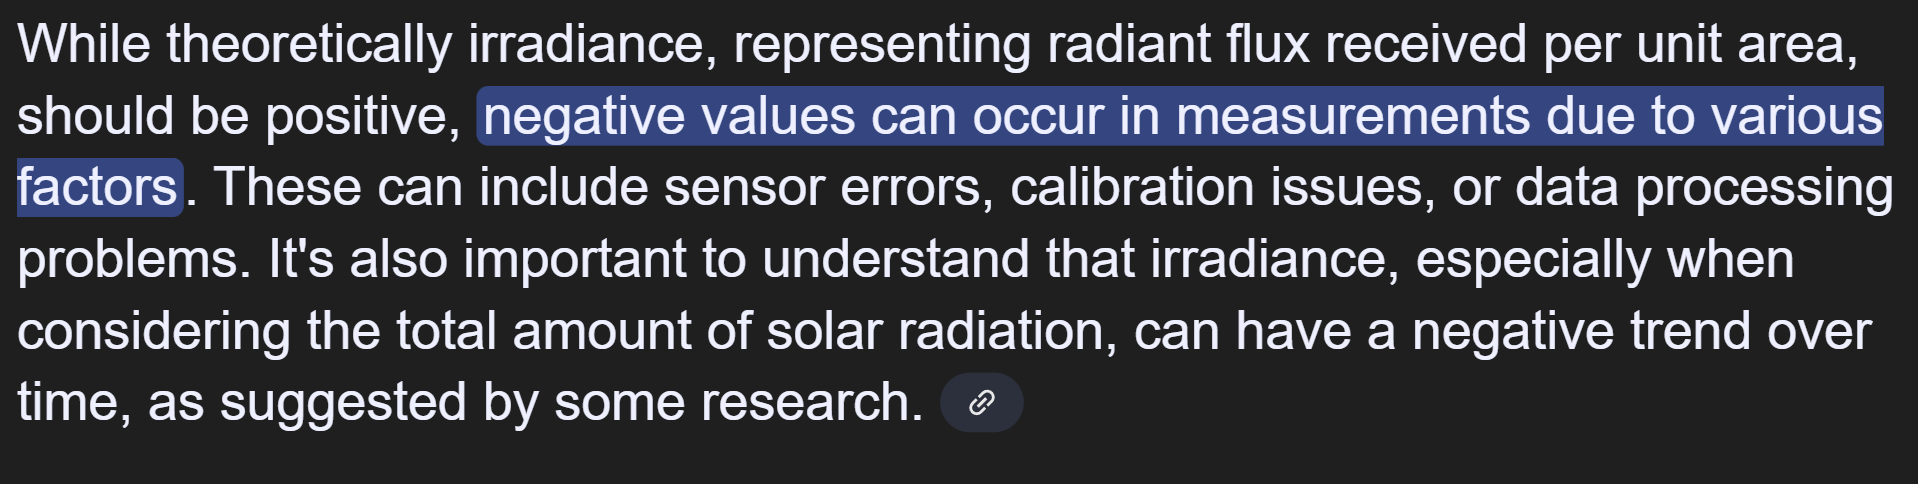

In [34]:
df_engineered[df_engineered['irradiance'] < 0]

,id,temperature,irradiance,humidity,panel_age,maintenance_count,soiling_ratio,voltage,current,module_temperature,...,temp_coefficient_effect,expected_irradiance_clean,soiling_loss,irradiance_cloud_ratio,age_degradation_factor,age_category,maintenance_frequency,wind_cooling_effect,effective_module_temp,installation_type_tracking
142,142,51.366834,-33.011570,35.733259,24.137003,8.000000,0.407266,0.000000,0.114599,53.848671,...,0.894533,-81.056459,-48.044889,-0.693247,0.855178,Old,0.318256,14.986099,38.862572,0
204,204,26.876771,-12.543025,72.503816,23.772131,7.000000,0.691237,0.000000,1.212330,28.976507,...,0.992493,-18.145760,-5.602735,-0.231232,0.857367,Old,0.282576,7.104027,21.872480,0
236,236,19.118663,-36.822257,95.818452,26.097537,1.000000,0.460524,0.000000,0.536300,23.972404,...,1.023525,-79.957252,-43.134995,-0.372561,0.843415,Old,0.036904,1.685149,22.287255,1
293,293,34.460319,-141.664610,9.945129,1.508737,2.000000,0.812488,0.000000,0.261955,37.575846,...,0.962159,-174.359112,-32.694501,-35.607537,0.990948,New,0.797214,7.519384,30.056461,0
340,340,14.513872,-72.822377,88.568786,14.461198,0.000000,0.642173,0.000000,1.103876,17.376232,...,1.041945,-113.399957,-40.577579,-1.809056,0.913233,Old,0.000000,24.997510,-7.621279,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19538,19538,22.661424,-275.690199,88.402348,11.373941,5.000000,0.985938,0.000000,1.049879,27.296848,...,1.009354,-279.622322,-3.932123,-8.003809,0.931756,Old,0.404075,3.765775,23.531074,1
19557,19557,32.775252,-78.081373,42.590934,15.176632,5.000000,0.588755,20.544965,0.529039,34.249689,...,0.968899,-132.621085,-54.539712,-2.210396,0.908940,Old,0.309088,9.518727,24.730962,1
19592,19592,31.584028,-23.957739,69.180531,21.436218,5.000000,0.738390,0.000000,0.427826,34.084232,...,0.973664,-32.445919,-8.488180,-0.316180,0.871383,Old,0.222854,1.127986,32.956247,0
19824,19824,23.492475,-36.379618,3.015652,22.544653,6.000000,0.634214,4.600797,0.512977,28.214559,...,1.006030,-57.361740,-20.982122,-0.528065,0.864732,Old,0.254835,22.626007,5.588551,0


### Faulty data so removing rows with negative irradiance


In [35]:
df_engineered = df_engineered[df_engineered['irradiance'] >= 0]

In [36]:
df_engineered['irradiance_boxcox'], _ = stats.boxcox(df_engineered['irradiance'] + 1)


In [37]:
df_engineered['power_output_log'] = np.log1p(df_engineered['power_output'])

In [40]:
scaler = RobustScaler()
df_engineered['temp_difference_robust'] = scaler.fit_transform(df_engineered[['temp_difference']]).flatten()

In [41]:
df_engineered['irradiance_winsorized'] = np.clip(df_engineered['irradiance'], 
                                                    np.percentile(df_engineered['irradiance'], 1),
                                                    np.percentile(df_engineered['irradiance'], 99))

In [42]:
required_cols = ['irradiance_normalized', 'temp_coefficient_effect', 'age_degradation_factor', 'soiling_ratio']
if all(col in df_engineered.columns for col in required_cols):
    df_engineered['theoretical_max_power'] = (df_engineered['irradiance_normalized'] * 
                                                df_engineered['temp_coefficient_effect'] * 
                                                df_engineered['age_degradation_factor'] * 
                                                df_engineered['soiling_ratio'])

In [43]:
df_engineered['performance_deviation'] = (df_engineered['power_output'] - 
                                                df_engineered['theoretical_max_power'])

In [44]:
df_engineered['efficiency_ratio'] = np.where(
        df_engineered['theoretical_max_power'] != 0,
        df_engineered['power_output'] / df_engineered['theoretical_max_power'],
        0
    )

In [45]:
string_stats = df_engineered.groupby('string_id')['power_output'].agg(['mean', 'std', 'min', 'max'])
string_stats.columns = ['power_output_string_mean', 'power_output_string_std', 
                            'power_output_string_min', 'power_output_string_max']

df_engineered = df_engineered.merge(string_stats, left_on='string_id', right_index=True, how='left')
df_engineered['power_vs_string_mean'] = (df_engineered['power_output'] - 
                                            df_engineered['power_output_string_mean'])

In [46]:
df_engineered['error_indicator'] = (df_engineered['error_code'] != 0).astype(int)

In [47]:
df_engineered['consecutive_errors'] = df_engineered.groupby('string_id')['error_indicator'].transform(
            lambda x: x.groupby((x != x.shift()).cumsum()).cumsum())

In [48]:
anomaly_features = ['power_output', 'irradiance', 'module_temperature']
available_anomaly_features = [col for col in anomaly_features if col in df_engineered.columns]

if len(available_anomaly_features) >= 2:
    iso_forest = IsolationForest(contamination=0.1, random_state=42)
    df_engineered['anomaly_score'] = iso_forest.fit_predict(
        df_engineered[available_anomaly_features])

In [49]:
clustering_features = ['irradiance_normalized', 'temp_difference', 'environmental_stress']
available_clustering_features = [col for col in clustering_features if col in df_engineered.columns]

In [50]:
if len(available_clustering_features) >= 2:
    # Handle missing values for clustering
    clustering_data = df_engineered[available_clustering_features].fillna(df_engineered[available_clustering_features].mean())
    
    kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
    df_engineered['operating_regime'] = kmeans.fit_predict(clustering_data)
    
    # Regime-specific performance metrics
    if 'power_output' in df_engineered.columns:
        regime_performance = df_engineered.groupby('operating_regime')['power_output'].mean()
        df_engineered['regime_expected_power'] = df_engineered['operating_regime'].map(regime_performance)
        df_engineered['regime_performance_deviation'] = (df_engineered['power_output'] - 
                                                        df_engineered['regime_expected_power'])

In [53]:
new_missing = df_engineered.isnull().sum().sum()
if new_missing > 0:
    print(f"Warning: {new_missing} missing values found after feature engineering")
    print("Missing values by column:")
    print(df_engineered.isnull().sum()[df_engineered.isnull().sum() > 0])

In [55]:
if features_to_drop:
    print(f"\nStep 4: Dropping features: {features_to_drop}")
    available_features = [col for col in features_to_drop if col in df_engineered.columns]
    unavailable_features = [col for col in features_to_drop if col not in df_engineered.columns]
    
    if available_features:
        df = df_engineered.drop(columns=available_features)
        print(f"Dropped features: {available_features}")
    
    if unavailable_features:
        print(f"Warning: Features not found in dataset: {unavailable_features}")
    
    print(f"Dataset shape after dropping features: {df.shape}")


Step 4: Dropping features: ['id', 'temperature', 'humidity', 'maintenance_count', 'voltage', 'module_temperature', 'pressure', 'string_id', 'error_code', 'installation_type', 'power_output', 'temp_difference', 'temp_coefficient_effect', 'expected_irradiance_clean', 'age_category', 'environmental_stress', 'effective_module_temp', 'power_output_log', 'temp_difference_robust', 'performance_deviation', 'efficiency_ratio', 'mean', 'std', 'min', 'max', 'power_output_string_mean', 'power_output_string_std', 'power_output_string_min', 'power_output_string_max', 'power_vs_string_mean', 'error_indicator', 'consecutive_errors', 'anomaly_score', 'operating_regime', 'regime_expected_power', 'regime_performance_deviation']
Dropped features: ['id', 'temperature', 'humidity', 'maintenance_count', 'voltage', 'module_temperature', 'pressure', 'string_id', 'error_code', 'installation_type', 'power_output', 'temp_difference', 'temp_coefficient_effect', 'expected_irradiance_clean', 'age_category', 'effect

In [57]:
target_col = 'efficiency'
feature_cols = [col for col in df.columns if col != target_col]

categorical_cols = df[feature_cols].select_dtypes(include=['object']).columns.tolist()
numerical_cols = df[feature_cols].select_dtypes(include=['float64', 'int64']).columns.tolist()

print(f"Categorical columns: {categorical_cols}")
print(f"Numerical columns: {numerical_cols}")
print(f"Total features: {len(feature_cols)}")

Categorical columns: []
Numerical columns: ['irradiance', 'panel_age', 'soiling_ratio', 'current', 'cloud_coverage', 'wind_speed', 'irradiance_normalized', 'soiling_loss', 'irradiance_cloud_ratio', 'age_degradation_factor', 'maintenance_frequency', 'wind_cooling_effect', 'irradiance_boxcox', 'irradiance_winsorized', 'theoretical_max_power']
Total features: 16


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, PowerTransformer, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.base import BaseEstimator, RegressorMixin

# Neural Network imports
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l1_l2

from utils.imputation import ImputationPipeline
import warnings
warnings.filterwarnings('ignore')

# Set random seeds for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

class ANNRegressor(BaseEstimator, RegressorMixin):
    """
    Custom ANN Regressor wrapper that mimics scikit-learn interface
    """
    def __init__(self, neurons=128, layers=3, dropout_rate=0.3, 
                 learning_rate=0.001, l1_reg=0.0, l2_reg=0.01,
                 epochs=200, batch_size=32, validation_split=0.2,
                 patience=20, verbose=0):
        self.neurons = neurons
        self.layers = layers
        self.dropout_rate = dropout_rate
        self.learning_rate = learning_rate
        self.l1_reg = l1_reg
        self.l2_reg = l2_reg
        self.epochs = epochs
        self.batch_size = batch_size
        self.validation_split = validation_split
        self.patience = patience
        self.verbose = verbose
        self.model_ = None
        self.history_ = None
        
    def _build_model(self, input_dim):
        """Build the neural network model"""
        model = Sequential()
        
        # Input layer
        model.add(Dense(self.neurons, 
                       input_dim=input_dim,
                       activation='relu',
                       kernel_regularizer=l1_l2(l1=self.l1_reg, l2=self.l2_reg)))
        model.add(BatchNormalization())
        model.add(Dropout(self.dropout_rate))
        
        # Hidden layers
        for i in range(self.layers - 1):
            # Gradually decrease neurons in deeper layers
            layer_neurons = max(self.neurons // (2 ** i), 32)
            model.add(Dense(layer_neurons,
                           activation='relu',
                           kernel_regularizer=l1_l2(l1=self.l1_reg, l2=self.l2_reg)))
            model.add(BatchNormalization())
            model.add(Dropout(self.dropout_rate))
        
        # Output layer
        model.add(Dense(1, activation='linear'))
        
        # Compile model
        optimizer = Adam(learning_rate=self.learning_rate)
        model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
        
        return model
    
    def fit(self, X, y, **kwargs):
        """Fit the neural network"""
        # Convert to numpy arrays if needed
        if hasattr(X, 'values'):
            X = X.values
        if hasattr(y, 'values'):
            y = y.values
            
        # Ensure y is 1D
        if len(y.shape) > 1:
            y = y.flatten()
        
        # Build model
        self.model_ = self._build_model(X.shape[1])
        
        # Set up callbacks
        callbacks = [
            EarlyStopping(patience=self.patience, restore_best_weights=True),
            ReduceLROnPlateau(patience=self.patience//2, factor=0.5, min_lr=1e-6)
        ]
        
        # Train model
        self.history_ = self.model_.fit(
            X, y,
            epochs=self.epochs,
            batch_size=self.batch_size,
            validation_split=self.validation_split,
            callbacks=callbacks,
            verbose=self.verbose
        )
        
        return self
    
    def predict(self, X):
        """Make predictions"""
        if self.model_ is None:
            raise ValueError("Model must be fitted before making predictions")
            
        # Convert to numpy array if needed
        if hasattr(X, 'values'):
            X = X.values
            
        predictions = self.model_.predict(X, verbose=0)
        return predictions.flatten()
    
    def get_params(self, deep=True):
        """Get parameters for this estimator"""
        return {
            'neurons': self.neurons,
            'layers': self.layers,
            'dropout_rate': self.dropout_rate,
            'learning_rate': self.learning_rate,
            'l1_reg': self.l1_reg,
            'l2_reg': self.l2_reg,
            'epochs': self.epochs,
            'batch_size': self.batch_size,
            'validation_split': self.validation_split,
            'patience': self.patience,
            'verbose': self.verbose
        }
    
    def set_params(self, **params):
        """Set parameters for this estimator"""
        for key, value in params.items():
            setattr(self, key, value)
        return self

class SolarPanelModelSelector:
    def __init__(self, data_path='dataset/train.csv', test_size=0.2, random_state=42, features_to_drop=None):
        """
        Initialize the model selector with data loading and basic setup
        """
        self.data_path = data_path
        self.test_size = test_size
        self.random_state = random_state
        self.models = {}
        self.results = {}
        self.best_model = None
        self.preprocessor = None
        self.imputer = None
        self.features_to_drop = features_to_drop or []
        
        # Stacking-specific attributes
        self.stacking_results = {}
        self.best_stacking_model = None
        
    def fix_data_types(self, df, dataset_name):
        """Fix data type inconsistencies for specific columns"""
        df_fixed = df.copy()
        
        # Define columns that should be numeric
        numeric_columns_to_fix = ['humidity', 'wind_speed', 'pressure']
        
        print(f"\n=== FIXING DATA TYPES FOR {dataset_name} ===")
        
        for col in numeric_columns_to_fix:
            if col in df_fixed.columns:
                print(f"\nProcessing {col}:")
                print(f"Original dtype: {df_fixed[col].dtype}")
                
                # Check for non-numeric values before conversion
                if df_fixed[col].dtype == 'object':
                    # Display unique non-numeric values
                    try:
                        # Try to convert to numeric and see what fails
                        numeric_conversion = pd.to_numeric(df_fixed[col], errors='coerce')
                        non_numeric_mask = pd.isna(numeric_conversion) & df_fixed[col].notna()
                        
                        if non_numeric_mask.any():
                            print(f"Non-numeric values found in {col}:")
                            non_numeric_values = df_fixed.loc[non_numeric_mask, col].value_counts()
                            print(non_numeric_values.head(10))
                            
                            # Handle common non-numeric patterns
                            df_fixed[col] = df_fixed[col].astype(str)
                            
                            # Remove common problematic characters
                            df_fixed[col] = df_fixed[col].str.replace(r'[^\d.-]', '', regex=True)
                            df_fixed[col] = df_fixed[col].str.strip()
                            
                            # Handle empty strings
                            df_fixed[col] = df_fixed[col].replace('', np.nan)
                            df_fixed[col] = df_fixed[col].replace('nan', np.nan)
                            
                        # Convert to numeric
                        df_fixed[col] = pd.to_numeric(df_fixed[col], errors='coerce')
                        
                        print(f"Converted dtype: {df_fixed[col].dtype}")
                        print(f"Missing values after conversion: {df_fixed[col].isnull().sum()}")
                        print(f"Valid numeric values: {df_fixed[col].notna().sum()}")
                        
                        # Basic statistics for converted column
                        if df_fixed[col].notna().any():
                            print(f"Min: {df_fixed[col].min():.3f}")
                            print(f"Max: {df_fixed[col].max():.3f}")
                            print(f"Mean: {df_fixed[col].mean():.3f}")
                            
                    except Exception as e:
                        print(f"Error converting {col}: {str(e)}")
                else:
                    print(f"{col} is already numeric type: {df_fixed[col].dtype}")
        
        return df_fixed
        
    def load_and_prepare_data(self):
        """
        Load raw data, fix data types, and apply imputation pipeline
        """
        print("Loading raw data...")
        self.df_raw = pd.read_csv(self.data_path)
        print(f"Raw dataset shape: {self.df_raw.shape}")
        print(f"Missing values in raw data:\n{self.df_raw.isnull().sum()[self.df_raw.isnull().sum() > 0]}")
        
        # Step 1: Fix data types BEFORE imputation
        print("\nStep 1: Fixing data types...")
        self.df_fixed = self.fix_data_types(self.df_raw, "TRAINING DATA")
        
        # Verify the fixes
        print("\n=== DATA TYPE VERIFICATION ===")
        print("Data types after fixing:")
        for col in ['humidity', 'wind_speed', 'pressure']:
            if col in self.df_fixed.columns:
                print(f"{col}: {self.df_fixed[col].dtype}")
        
        # Step 2: Initialize and apply imputation pipeline (WITHOUT feature creation)
        print("\nStep 2: Applying imputation pipeline...")
        self.imputer = ImputationPipeline()
        self.df_imputed = self.imputer.fit_transform(self.df_fixed)
        
        print(f"Dataset shape after imputation: {self.df_imputed.shape}")
        remaining_missing = self.df_imputed.isnull().sum().sum()
        print(f"Remaining missing values after imputation: {remaining_missing}")
        
        # Step 3: NOW create features AFTER imputation is complete
        print("\nStep 3: Creating engineered features...")
        from utils.feature_engineering import SolarFeatureEngineering
        feature_engineer = SolarFeatureEngineering()
        self.df = feature_engineer.create_solar_features(self.df_imputed)
        print(f"Dataset shape after feature engineering: {self.df.shape}")
        print("New features created:")
        print(self.df.columns.difference(self.df_imputed.columns).tolist())
        
        # Verify no missing values in new features
        new_missing = self.df.isnull().sum().sum()
        if new_missing > 0:
            print(f"Warning: {new_missing} missing values found after feature engineering")
            print("Missing values by column:")
            print(self.df.isnull().sum()[self.df.isnull().sum() > 0])

        # Step 4: Drop selected features if specified
        if self.features_to_drop:
            print(f"\nStep 4: Dropping features: {self.features_to_drop}")
            available_features = [col for col in self.features_to_drop if col in self.df.columns]
            unavailable_features = [col for col in self.features_to_drop if col not in self.df.columns]
            
            if available_features:
                self.df = self.df.drop(columns=available_features)
                print(f"Dropped features: {available_features}")
            
            if unavailable_features:
                print(f"Warning: Features not found in dataset: {unavailable_features}")
            
            print(f"Dataset shape after dropping features: {self.df.shape}")
        
        # Separate features and target
        self.target_col = 'efficiency'
        self.feature_cols = [col for col in self.df.columns if col != self.target_col]
        
        # Identify categorical and numerical columns
        self.categorical_cols = self.df[self.feature_cols].select_dtypes(include=['object']).columns.tolist()
        self.numerical_cols = self.df[self.feature_cols].select_dtypes(include=['float64', 'int64']).columns.tolist()
        
        print(f"Categorical columns: {self.categorical_cols}")
        print(f"Numerical columns: {self.numerical_cols}")
        print(f"Total features: {len(self.feature_cols)}")
        
        return self.df
    
    def create_preprocessing_pipeline(self):
        """
        Create preprocessing pipeline for numerical and categorical features
        """
        print("Creating preprocessing pipeline...")
        
        # For neural networks, we need StandardScaler instead of RobustScaler
        # as neural networks work better with standardized inputs
        numerical_pipeline = Pipeline([
            ('scaler', StandardScaler())  # Neural networks prefer StandardScaler
        ])
        
        # Categorical preprocessing pipeline
        categorical_pipeline = Pipeline([
            ('encoder', 'passthrough')  # Will be handled separately
        ])
        
        # Create preprocessor
        self.preprocessor = ColumnTransformer([
            ('num', numerical_pipeline, self.numerical_cols),
            ('cat', categorical_pipeline, self.categorical_cols)
        ])
        
        return self.preprocessor
    
    def prepare_train_test_split(self):
        """
        Prepare train-test split with proper preprocessing
        """
        print("Preparing train-test split...")
        
        X = self.df[self.feature_cols].copy()
        y = self.df[self.target_col].copy()
        
        # Store original target values for later use
        self.y_original = y.copy()
        
        # Apply power transformation to target if it's skewed
        self.target_transformer = PowerTransformer(method='yeo-johnson')
        y_transformed = self.target_transformer.fit_transform(y.values.reshape(-1, 1)).flatten()
        
        # Train-test split
        X_train, X_test, y_train, y_test = train_test_split(
            X, y_transformed, test_size=self.test_size, random_state=self.random_state, stratify=None
        )
        
        # Also split original target for evaluation
        _, _, self.y_train_original, self.y_test_original = train_test_split(
            X, y, test_size=self.test_size, random_state=self.random_state, stratify=None
        )
        
        # Handle categorical encoding
        self.label_encoders = {}
        for col in self.categorical_cols:
            le = LabelEncoder()
            X_train[col] = le.fit_transform(X_train[col].astype(str))
            X_test[col] = le.transform(X_test[col].astype(str))
            self.label_encoders[col] = le
        
        # Apply numerical preprocessing
        X_train_scaled = self.preprocessor.fit_transform(X_train)
        X_test_scaled = self.preprocessor.transform(X_test)
        
        # Convert back to DataFrame for easier handling
        feature_names = self.numerical_cols + self.categorical_cols
        X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names)
        X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_names)
        
        self.X_train, self.X_test = X_train_scaled, X_test_scaled
        self.y_train, self.y_test = y_train, y_test
        
        print(f"Training set shape: {self.X_train.shape}")
        print(f"Test set shape: {self.X_test.shape}")
        
        return self.X_train, self.X_test, self.y_train, self.y_test
    
    def define_models(self):
        """
        Define all models to be tested including ANN
        """
        print("Defining models...")
        
        self.models = {
            'Linear Regression': LinearRegression(),
            'Ridge': Ridge(random_state=self.random_state),
            'Lasso': Lasso(random_state=self.random_state),
            'ElasticNet': ElasticNet(random_state=self.random_state),
            'Decision Tree': DecisionTreeRegressor(random_state=self.random_state),
            'Random Forest': RandomForestRegressor(random_state=self.random_state, n_jobs=-1),
            'Extra Trees': ExtraTreesRegressor(random_state=self.random_state, n_jobs=-1),
            'Gradient Boosting': GradientBoostingRegressor(random_state=self.random_state),
            'XGBoost': XGBRegressor(random_state=self.random_state, eval_metric='rmse'),
            'LightGBM': LGBMRegressor(random_state=self.random_state, verbose=-1),
            'CatBoost': CatBoostRegressor(random_state=self.random_state, verbose=False),
            'KNN': KNeighborsRegressor(),
            'SVR': SVR(),
            # 'ANN': ANNRegressor(verbose=0)  # Use custom ANN wrapper
        }
        
        return self.models
    
    def inverse_transform_predictions(self, y_pred):
        """
        Apply inverse transformation to predictions to get them back to original scale
        """
        y_pred_reshaped = y_pred.reshape(-1, 1)
        y_pred_original = self.target_transformer.inverse_transform(y_pred_reshaped).flatten()
        return y_pred_original
    
    def custom_score_function(self, y_true, y_pred):
        """
        Custom scoring function as per problem statement
        Score = 100*(1-sqrt(MSE))
        Note: This should be calculated on original scale, not transformed scale
        """
        mse = mean_squared_error(y_true, y_pred)
        score = 100 * (1 - np.sqrt(mse))
        return score
    
    def evaluate_base_models(self):
        """
        Evaluate all base models using cross-validation
        """
        print("Evaluating base models...")
        
        self.results = {}
        
        for name, model in self.models.items():
            print(f"Training {name}...")
            
            try:
                # Cross-validation scores (on transformed target)
                if name == 'ANN':
                    # For ANN, use fewer CV folds due to computational cost
                    cv_scores = cross_val_score(model, self.X_train, self.y_train, cv=3, 
                                              scoring='neg_mean_squared_error', n_jobs=1)
                else:
                    cv_scores = cross_val_score(model, self.X_train, self.y_train, cv=5, 
                                              scoring='neg_mean_squared_error', n_jobs=-1)
                
                # Fit model for additional metrics
                model.fit(self.X_train, self.y_train)
                
                # Get predictions on transformed scale
                y_pred_train_transformed = model.predict(self.X_train)
                y_pred_test_transformed = model.predict(self.X_test)
                
                # Transform predictions back to original scale
                y_pred_train_original = self.inverse_transform_predictions(y_pred_train_transformed)
                y_pred_test_original = self.inverse_transform_predictions(y_pred_test_transformed)
                
                # Calculate metrics on ORIGINAL scale
                train_rmse = np.sqrt(mean_squared_error(self.y_train_original, y_pred_train_original))
                test_rmse = np.sqrt(mean_squared_error(self.y_test_original, y_pred_test_original))
                train_r2 = r2_score(self.y_train_original, y_pred_train_original)
                test_r2 = r2_score(self.y_test_original, y_pred_test_original)
                
                # Custom score on original scale
                train_custom_score = self.custom_score_function(self.y_train_original, y_pred_train_original)
                test_custom_score = self.custom_score_function(self.y_test_original, y_pred_test_original)
                
                # CV RMSE on transformed scale (for comparison)
                cv_rmse_transformed = np.sqrt(-cv_scores.mean())
                
                self.results[name] = {
                    'CV_RMSE_transformed': cv_rmse_transformed,
                    'CV_RMSE_std': np.sqrt(cv_scores.std()),
                    'Train_RMSE': train_rmse,
                    'Test_RMSE': test_rmse,
                    'Train_R2': train_r2,
                    'Test_R2': test_r2,
                    'Train_Custom_Score': train_custom_score,
                    'Test_Custom_Score': test_custom_score,
                    'Model': model
                }
                
                print(f"  ✓ {name} completed - Test Custom Score: {test_custom_score:.4f}")
                
            except Exception as e:
                print(f"  ✗ Error training {name}: {str(e)}")
                continue
        
        return self.results
    
    def get_hyperparameter_grids(self):
        """
        Define hyperparameter grids for top performing models including ANN
        """
        param_grids = {
            'Random Forest': {
                'n_estimators': [100, 200, 300],
                'max_depth': [10, 20, None],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [1, 2, 4],
                'max_features': ['sqrt', 'log2']
            },
            'XGBoost': {
                'n_estimators': [100, 200, 300],
                'max_depth': [3, 6, 9],
                'learning_rate': [0.01, 0.1, 0.2],
                'subsample': [0.8, 0.9, 1.0],
                'colsample_bytree': [0.8, 0.9, 1.0]
            },
            'LightGBM': {
                'n_estimators': [100, 200, 300],
                'max_depth': [3, 6, 9],
                'learning_rate': [0.01, 0.1, 0.2],
                'num_leaves': [31, 50, 100],
                'subsample': [0.8, 0.9, 1.0]
            },
            'Gradient Boosting': {
                'n_estimators': [100, 200],
                'max_depth': [3, 5, 7],
                'learning_rate': [0.01, 0.1, 0.2],
                'subsample': [0.8, 0.9, 1.0]
            },
            'Ridge': {
                'alpha': [0.1, 1.0, 10.0, 100.0]
            },
            'Lasso': {
                'alpha': [0.001, 0.01, 0.1, 1.0]
            },
            'ANN': {
                'neurons': [64, 128, 256],
                'layers': [2, 3, 4],
                'dropout_rate': [0.2, 0.3, 0.4],
                'learning_rate': [0.001, 0.01],
                'l2_reg': [0.001, 0.01, 0.1],
                'epochs': [150, 250],
                'batch_size': [16, 32, 64]
            }
        }
        
        return param_grids
    
    def hyperparameter_tuning(self, top_n=5):
        """
        Perform hyperparameter tuning for top N models including ANN
        """
        print(f"Performing hyperparameter tuning for top {top_n} models...")
        
        # Sort models by test RMSE
        sorted_models = sorted(self.results.items(), key=lambda x: x[1]['Test_RMSE'])
        top_models = [name for name, _ in sorted_models[:top_n]]
        
        param_grids = self.get_hyperparameter_grids()
        tuned_results = {}
        
        for model_name in top_models:
            if model_name in param_grids:
                print(f"Tuning {model_name}...")
                
                try:
                    base_model = self.models[model_name]
                    param_grid = param_grids[model_name]
                    
                    # Use different search strategies for different models
                    if model_name == 'ANN':
                        # Use fewer iterations for ANN due to computational cost
                        grid_search = RandomizedSearchCV(
                            base_model, param_grid, n_iter=10, cv=3,
                            scoring='neg_mean_squared_error', n_jobs=1,
                            random_state=self.random_state
                        )
                    else:
                        # Use RandomizedSearchCV for faster tuning
                        grid_search = RandomizedSearchCV(
                            base_model, param_grid, n_iter=20, cv=5,
                            scoring='neg_mean_squared_error', n_jobs=-1,
                            random_state=self.random_state
                        )
                    
                    grid_search.fit(self.X_train, self.y_train)
                    
                    # Evaluate best model
                    best_model = grid_search.best_estimator_
                    
                    # Get predictions on transformed scale
                    y_pred_train_transformed = best_model.predict(self.X_train)
                    y_pred_test_transformed = best_model.predict(self.X_test)
                    
                    # Transform predictions back to original scale
                    y_pred_train_original = self.inverse_transform_predictions(y_pred_train_transformed)
                    y_pred_test_original = self.inverse_transform_predictions(y_pred_test_transformed)
                    
                    tuned_results[f'{model_name}_Tuned'] = {
                        'Best_Params': grid_search.best_params_,
                        'CV_RMSE_transformed': np.sqrt(-grid_search.best_score_),
                        'Train_RMSE': np.sqrt(mean_squared_error(self.y_train_original, y_pred_train_original)),
                        'Test_RMSE': np.sqrt(mean_squared_error(self.y_test_original, y_pred_test_original)),
                        'Train_R2': r2_score(self.y_train_original, y_pred_train_original),
                        'Test_R2': r2_score(self.y_test_original, y_pred_test_original),
                        'Train_Custom_Score': self.custom_score_function(self.y_train_original, y_pred_train_original),
                        'Test_Custom_Score': self.custom_score_function(self.y_test_original, y_pred_test_original),
                        'Model': best_model
                    }
                    
                    print(f"  ✓ {model_name} tuning completed")
                    
                except Exception as e:
                    print(f"  ✗ Error tuning {model_name}: {str(e)}")
                    continue
        
        self.tuned_results = tuned_results
        return tuned_results
    
    def create_stacking_models(self, n_best=2):
        """
        Create stacking regressor using the top N performing tuned models as base estimators.
        
        Parameters:
        n_best: Number of best models to use as base estimators (default: 2)
        """
        print(f"\nCreating stacking regressor with top {n_best} tuned models...")

        if not hasattr(self, 'tuned_results') or not self.tuned_results:
            raise ValueError("No tuned models found. Please tune models before creating stacking models.")

        # Step 1: Create a dictionary of tuned models only
        best_models_by_type = {}

        for name, results in self.tuned_results.items():
            # Extract the base model type from tuned name (e.g., "ANN_Tuned" -> "ann")
            if name.endswith('_Tuned'):
                base_name = name[:-6]  # Remove "_Tuned"
            else:
                base_name = name
            
            model_type = base_name.lower().replace(' ', '_')
            best_models_by_type[model_type] = {
                'name': name,
                'results': results,
                'is_tuned': True
            }

        # Step 2: Sort tuned models by performance
        sorted_models = sorted(
            best_models_by_type.items(),
            key=lambda x: x[1]['results']['Test_Custom_Score'],
            reverse=True
        )

        top_models = sorted_models[:n_best]

        print(f"Selected base estimators for stacking (tuned only):")
        for i, (model_type, model_info) in enumerate(top_models, 1):
            print(f"  {i}. {model_info['name']} - Test Custom Score: {model_info['results']['Test_Custom_Score']:.4f}")

        # Step 3: Prepare base estimators
        base_estimators = []
        for model_type, model_info in top_models:
            estimator = model_info['results']['Model']
            base_estimators.append((model_type, estimator))

        estimator_names = [name for name, _ in base_estimators]
        if len(estimator_names) != len(set(estimator_names)):
            raise ValueError(f"Duplicate estimator names found: {estimator_names}")

        print(f"Base estimator names: {estimator_names}")

        # Step 4: Define meta-regressors
        meta_regressors = {
            'Linear': LinearRegression(),
            'Ridge': Ridge(alpha=1.0, random_state=self.random_state),
            'Lasso': Lasso(alpha=0.1, random_state=self.random_state),
            'ElasticNet': ElasticNet(alpha=0.1, random_state=self.random_state),
            'Random Forest': RandomForestRegressor(n_estimators=100, random_state=self.random_state, n_jobs=-1)
        }

        stacking_models = {}

        for meta_name, meta_regressor in meta_regressors.items():
            stacking_name = f"Stacking_{meta_name}"

            stacking_model = StackingRegressor(
                estimators=base_estimators,
                final_estimator=meta_regressor,
                cv=3,
                n_jobs=-1,
                passthrough=False
            )

            stacking_models[stacking_name] = stacking_model

        # Step 5: Train and evaluate stacking models
        self.stacking_results = {}

        for stacking_name, stacking_model in stacking_models.items():
            print(f"\nTraining {stacking_name}...")

            try:
                stacking_model.fit(self.X_train, self.y_train)

                y_pred_train_transformed = stacking_model.predict(self.X_train)
                y_pred_test_transformed = stacking_model.predict(self.X_test)

                y_pred_train_original = self.inverse_transform_predictions(y_pred_train_transformed)
                y_pred_test_original = self.inverse_transform_predictions(y_pred_test_transformed)

                train_rmse = np.sqrt(mean_squared_error(self.y_train_original, y_pred_train_original))
                test_rmse = np.sqrt(mean_squared_error(self.y_test_original, y_pred_test_original))
                train_r2 = r2_score(self.y_train_original, y_pred_train_original)
                test_r2 = r2_score(self.y_test_original, y_pred_test_original)

                train_custom_score = self.custom_score_function(self.y_train_original, y_pred_train_original)
                test_custom_score = self.custom_score_function(self.y_test_original, y_pred_test_original)

                cv_scores = cross_val_score(stacking_model, self.X_train, self.y_train,
                                            cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
                cv_rmse_transformed = np.sqrt(-cv_scores.mean())

                base_estimator_info = []
                for model_type, model_info in top_models:
                    base_estimator_info.append({
                        'name': model_info['name'],
                        'type': model_type,
                        'is_tuned': True,
                        'score': model_info['results']['Test_Custom_Score']
                    })

                self.stacking_results[stacking_name] = {
                    'Base_Estimators': base_estimator_info,
                    'Meta_Regressor': meta_name,
                    'CV_RMSE_transformed': cv_rmse_transformed,
                    'CV_RMSE_std': np.sqrt(cv_scores.std()),
                    'Train_RMSE': train_rmse,
                    'Test_RMSE': test_rmse,
                    'Train_R2': train_r2,
                    'Test_R2': test_r2,
                    'Train_Custom_Score': train_custom_score,
                    'Test_Custom_Score': test_custom_score,
                    'Model': stacking_model
                }

                print(f"  ✓ {stacking_name} completed - Test Custom Score: {test_custom_score:.4f}")

            except Exception as e:
                print(f"  ✗ Error training {stacking_name}: {str(e)}")
                continue

        # Step 6: Select best stacking model
        if self.stacking_results:
            best_stacking_name = max(self.stacking_results.keys(),
                                    key=lambda x: self.stacking_results[x]['Test_Custom_Score'])
            self.best_stacking_model = self.stacking_results[best_stacking_name]['Model']

            print(f"\nBest stacking model: {best_stacking_name}")
            print(f"Test Custom Score: {self.stacking_results[best_stacking_name]['Test_Custom_Score']:.4f}")
            print(f"Test RMSE: {self.stacking_results[best_stacking_name]['Test_RMSE']:.4f}")
            print(f"Test R²: {self.stacking_results[best_stacking_name]['Test_R2']:.4f}")

            print("Base estimators used:")
            for estimator_info in self.stacking_results[best_stacking_name]['Base_Estimators']:
                print(f"  - {estimator_info['name']} (Tuned): {estimator_info['score']:.4f}")

        return self.stacking_results


    def compare_all_models(self):
        """
        Compare all models including base, tuned, and stacking models
        """
        print("\n" + "="*80)
        print("COMPREHENSIVE MODEL COMPARISON")
        print("="*80)
        
        # Combine all results
        all_model_results = {}
        
        # Add base model results with "Base_" prefix for clarity
        for name, results in self.results.items():
            all_model_results[f"Base_{name}"] = results
        
        # Add tuned model results (these already have clear names)
        if hasattr(self, 'tuned_results'):
            for name, results in self.tuned_results.items():
                all_model_results[name] = results
        
        # Add stacking model results
        if hasattr(self, 'stacking_results'):
            for name, results in self.stacking_results.items():
                all_model_results[name] = results
        
        # Create comparison DataFrame
        comparison_data = []
        for name, results in all_model_results.items():
            comparison_data.append({
                'Model': name,
                'Test_RMSE': results['Test_RMSE'],
                'Test_R2': results['Test_R2'],
                'Test_Custom_Score': results['Test_Custom_Score'],
                'Train_Custom_Score': results['Train_Custom_Score'],
                'Overfitting': results['Train_Custom_Score'] - results['Test_Custom_Score']
            })
        
        comparison_df = pd.DataFrame(comparison_data)
        comparison_df = comparison_df.sort_values('Test_Custom_Score', ascending=False)
        
        print("\nTop 10 Models by Test Custom Score:")
        print("-" * 95)
        print(f"{'Model':<30} {'Test_RMSE':<12} {'Test_R²':<10} {'Test_Score':<12} {'Overfitting':<12} {'Type':<15}")
        print("-" * 95)
        
        for _, row in comparison_df.head(10).iterrows():
            # Determine model type
            model_name = row['Model']
            if model_name.startswith('Base_'):
                model_type = 'Base'
            elif model_name.endswith('_Tuned'):
                model_type = 'Tuned'
            elif model_name.startswith('Stacking_'):
                model_type = 'Stacking'
            else:
                model_type = 'Other'
            
            print(f"{model_name:<30} {row['Test_RMSE']:<12.4f} {row['Test_R2']:<10.4f} "
                f"{row['Test_Custom_Score']:<12.4f} {row['Overfitting']:<12.4f} {model_type:<15}")
        
        # Identify the overall best model
        best_model_name = comparison_df.iloc[0]['Model']
        best_model_results = all_model_results[best_model_name]
        
        print(f"\n🏆 BEST OVERALL MODEL: {best_model_name}")
        print(f"   Test Custom Score: {best_model_results['Test_Custom_Score']:.4f}")
        print(f"   Test RMSE: {best_model_results['Test_RMSE']:.4f}")
        print(f"   Test R²: {best_model_results['Test_R2']:.4f}")
        
        # Show additional information for stacking models
        if best_model_name.startswith('Stacking_') and hasattr(self, 'stacking_results'):
            stacking_info = self.stacking_results[best_model_name]
            print(f"   Meta Regressor: {stacking_info['Meta_Regressor']}")
            print(f"   Base Estimators:")
            for estimator_info in stacking_info['Base_Estimators']:
                status = "Tuned" if estimator_info['is_tuned'] else "Base"
                print(f"     - {estimator_info['name']} ({status}): {estimator_info['score']:.4f}")
        
        # Store the best model
        self.best_model = best_model_results['Model']
        self.best_model_name = best_model_name
        
        return comparison_df

    def get_model_summary(self):
        """
        Get a comprehensive summary of the model selection process
        """
        summary = {
            'dataset_info': {
                'original_shape': self.df_raw.shape if hasattr(self, 'df_raw') else None,
                'final_shape': self.df.shape if hasattr(self, 'df') else None,
                'features_dropped': self.features_to_drop,
                'categorical_features': len(self.categorical_cols) if hasattr(self, 'categorical_cols') else 0,
                'numerical_features': len(self.numerical_cols) if hasattr(self, 'numerical_cols') else 0
            },
            'model_counts': {
                'base_models': len(self.results) if hasattr(self, 'results') else 0,
                'tuned_models': len(self.tuned_results) if hasattr(self, 'tuned_results') else 0,
                'stacking_models': len(self.stacking_results) if hasattr(self, 'stacking_results') else 0
            },
            'best_model': {
                'name': self.best_model_name if hasattr(self, 'best_model_name') else None,
                'test_custom_score': None,
                'test_rmse': None,
                'test_r2': None
            }
        }
        
        # Add best model metrics if available
        if hasattr(self, 'best_model_name'):
            # Find the best model results
            all_results = {**self.results}
            if hasattr(self, 'tuned_results'):
                all_results.update(self.tuned_results)
            if hasattr(self, 'stacking_results'):
                all_results.update(self.stacking_results)
            
            if self.best_model_name in all_results:
                best_results = all_results[self.best_model_name]
                summary['best_model'].update({
                    'test_custom_score': best_results['Test_Custom_Score'],
                    'test_rmse': best_results['Test_RMSE'],
                    'test_r2': best_results['Test_R2']
                })
        
        return summary

    def run_complete_pipeline(self):
        """
        Run the complete model selection pipeline including stacking
        """
        print("🚀 STARTING COMPLETE MODEL SELECTION PIPELINE")
        print("="*60)
        
        # Step 1: Load and prepare data
        print("\n📊 STEP 1: Data Loading and Preparation")
        self.load_and_prepare_data()
        
        # Step 2: Create preprocessing pipeline
        print("\n🔧 STEP 2: Creating Preprocessing Pipeline")
        self.create_preprocessing_pipeline()
        
        # Step 3: Prepare train-test split
        print("\n✂️ STEP 3: Train-Test Split")
        self.prepare_train_test_split()
        
        # Step 4: Define and evaluate base models
        print("\n🤖 STEP 4: Base Model Evaluation")
        self.define_models()
        self.evaluate_base_models()
        
        # Step 5: Hyperparameter tuning
        print("\n⚙️ STEP 5: Hyperparameter Tuning")
        self.hyperparameter_tuning(top_n=5)
        
        # Step 6: Create stacking models
        print("\n🏗️ STEP 6: Stacking Model Creation")
        self.create_stacking_models(n_best=2)
        
        # Step 7: Compare all models
        print("\n📈 STEP 7: Final Model Comparison")
        comparison_df = self.compare_all_models()
        
        # Step 8: Generate summary
        print("\n📋 STEP 8: Pipeline Summary")
        summary = self.get_model_summary()
        
        print("\n✅ PIPELINE COMPLETED SUCCESSFULLY!")
        print(f"Best Model: {summary['best_model']['name']}")
        print(f"Final Test Score: {summary['best_model']['test_custom_score']:.4f}")
        
        return {
            'comparison_df': comparison_df,
            'summary': summary,
            'best_model': self.best_model,
            'best_model_name': self.best_model_name
        }
    
    def select_best_model(self):
        """
        Select the best model from all evaluated models (base, tuned, and stacking)
        """
        print("\n" + "="*60)
        print("SELECTING BEST MODEL")
        print("="*60)
        
        # Combine all results
        all_results = {}
        
        # Add base model results
        if hasattr(self, 'results'):
            for name, results in self.results.items():
                all_results[f"Base_{name}"] = results
        
        # Add tuned model results
        if hasattr(self, 'tuned_results'):
            for name, results in self.tuned_results.items():
                all_results[name] = results
        
        # Add stacking model results
        if hasattr(self, 'stacking_results'):
            for name, results in self.stacking_results.items():
                all_results[name] = results
        
        if not all_results:
            raise ValueError("No models have been evaluated yet!")
        
        # Find best model based on Test Custom Score
        best_model_name = max(all_results.keys(), 
                            key=lambda x: all_results[x]['Test_Custom_Score'])
        
        best_results = all_results[best_model_name]
        
        # Store best model information
        self.best_model = best_results['Model']
        self.best_model_name = best_model_name
        self.best_score = best_results['Test_Custom_Score']
        self.best_results = best_results
        
        print(f"🏆 BEST MODEL SELECTED: {best_model_name}")
        print(f"   Test Custom Score: {self.best_score:.4f}")
        print(f"   Test RMSE: {best_results['Test_RMSE']:.4f}")
        print(f"   Test R²: {best_results['Test_R2']:.4f}")
        
        # Display model-specific information
        if 'Best_Params' in best_results:
            print(f"   Best Parameters: {best_results['Best_Params']}")
        elif 'Base_Estimators' in best_results:
            print(f"   Base Estimators: {best_results['Base_Estimators']}")
            print(f"   Meta Regressor: {best_results['Meta_Regressor']}")
        
        return self.best_model, self.best_model_name, self.best_score

    def print_results_summary(self):
        """
        Print a comprehensive summary of all results
        """
        print("\n" + "="*80)
        print("COMPREHENSIVE RESULTS SUMMARY")
        print("="*80)
        
        # Dataset Information
        print(f"\n📊 DATASET INFORMATION:")
        print(f"   Original Shape: {self.df_raw.shape}")
        print(f"   Final Shape: {self.df.shape}")
        print(f"   Features Dropped: {len(self.features_to_drop)}")
        print(f"   Categorical Features: {len(self.categorical_cols)}")
        print(f"   Numerical Features: {len(self.numerical_cols)}")
        
        # Model Performance Summary
        print(f"\n🤖 MODEL PERFORMANCE SUMMARY:")
        
        # Base Models
        if hasattr(self, 'results') and self.results:
            print(f"\n   Base Models ({len(self.results)} models):")
            base_sorted = sorted(self.results.items(), 
                               key=lambda x: x[1]['Test_Custom_Score'], 
                               reverse=True)
            for i, (name, results) in enumerate(base_sorted[:3], 1):
                print(f"      {i}. {name}: {results['Test_Custom_Score']:.4f}")
        
        # Tuned Models
        if hasattr(self, 'tuned_results') and self.tuned_results:
            print(f"\n   Tuned Models ({len(self.tuned_results)} models):")
            tuned_sorted = sorted(self.tuned_results.items(), 
                                key=lambda x: x[1]['Test_Custom_Score'], 
                                reverse=True)
            for i, (name, results) in enumerate(tuned_sorted, 1):
                print(f"      {i}. {name}: {results['Test_Custom_Score']:.4f}")
        
        # Stacking Models
        if hasattr(self, 'stacking_results') and self.stacking_results:
            print(f"\n   Stacking Models ({len(self.stacking_results)} models):")
            stacking_sorted = sorted(self.stacking_results.items(), 
                                   key=lambda x: x[1]['Test_Custom_Score'], 
                                   reverse=True)
            for i, (name, results) in enumerate(stacking_sorted, 1):
                print(f"      {i}. {name}: {results['Test_Custom_Score']:.4f}")
        
        # Best Model Information
        if hasattr(self, 'best_model_name'):
            print(f"\n🏆 BEST OVERALL MODEL:")
            print(f"   Model: {self.best_model_name}")
            print(f"   Test Custom Score: {self.best_score:.4f}")
            print(f"   Test RMSE: {self.best_results['Test_RMSE']:.4f}")
            print(f"   Test R²: {self.best_results['Test_R2']:.4f}")
            print(f"   Train Custom Score: {self.best_results['Train_Custom_Score']:.4f}")
            overfitting = self.best_results['Train_Custom_Score'] - self.best_results['Test_Custom_Score']
            print(f"   Overfitting Gap: {overfitting:.4f}")
        
        print("\n" + "="*80)

    def predict(self, X_new):
        """
        Make predictions on new data using the complete pipeline
        """
        if self.best_model is None:
            raise ValueError("No model has been trained yet. Run the pipeline first.")
        
        print("Making predictions on new data...")
        
        # Step 1: Fix data types (same as training)
        X_processed = self.fix_data_types(X_new.copy(), "NEW DATA")
        
        # Step 2: Apply imputation pipeline
        X_processed = self.imputer.transform(X_processed)
        
        # Step 3: Apply feature engineering
        from utils.feature_engineering import SolarFeatureEngineering
        feature_engineer = SolarFeatureEngineering()
        X_processed = feature_engineer.create_solar_features(X_processed)
        
        # Step 4: Drop features that were dropped during training
        if self.features_to_drop:
            available_features = [col for col in self.features_to_drop if col in X_processed.columns]
            if available_features:
                X_processed = X_processed.drop(columns=available_features)
        
        # Step 5: Select only the features used in training
        X_processed = X_processed[self.feature_cols]
        
        # Step 6: Apply categorical encoding
        for col in self.categorical_cols:
            if col in X_processed.columns:
                # Handle unseen categories by using the most frequent category
                try:
                    X_processed[col] = self.label_encoders[col].transform(X_processed[col].astype(str))
                except ValueError:
                    # If unseen categories, replace with most frequent
                    most_frequent_encoded = 0  # Assuming first category is most frequent
                    X_processed[col] = X_processed[col].apply(
                        lambda x: self.label_encoders[col].transform([str(x)])[0] 
                        if str(x) in self.label_encoders[col].classes_ 
                        else most_frequent_encoded
                    )
        
        # Step 7: Apply preprocessing
        X_scaled = self.preprocessor.transform(X_processed)
        
        # Convert back to DataFrame
        feature_names = self.numerical_cols + self.categorical_cols
        X_scaled = pd.DataFrame(X_scaled, columns=feature_names)
        
        # Step 8: Make predictions (on transformed scale)
        predictions_transformed = self.best_model.predict(X_scaled)
        
        # Step 9: Transform predictions back to original scale
        predictions_original = self.inverse_transform_predictions(predictions_transformed)
        
        print(f"Predictions completed for {len(predictions_original)} samples")
        
        return predictions_original

    def save_best_model(self, filepath='model/best_solar_model_complete.pkl'):
        """
        Save the best model and all preprocessing components
        """
        import pickle
        import os
        
        # Create directory if it doesn't exist
        os.makedirs(os.path.dirname(filepath), exist_ok=True)
        
        model_package = {
            'model': self.best_model,
            'preprocessor': self.preprocessor,
            'label_encoders': self.label_encoders,
            'target_transformer': self.target_transformer,
            'imputer': self.imputer,
            'feature_names': self.feature_cols,
            'categorical_cols': self.categorical_cols,
            'numerical_cols': self.numerical_cols,
            'best_model_name': self.best_model_name,
            'best_score': self.best_score,
            'features_to_drop': self.features_to_drop,
            'best_results': self.best_results,
            'target_col': self.target_col
        }
        
        with open(filepath, 'wb') as f:
            pickle.dump(model_package, f)
        
        print(f"✅ Best model with complete pipeline saved to {filepath}")
        print(f"   Model: {self.best_model_name}")
        print(f"   Score: {self.best_score:.4f}")
    
    def load_model(self, filepath='model/best_solar_model_complete.pkl'):
        """
        Load a saved model with complete pipeline
        """
        import pickle
        
        with open(filepath, 'rb') as f:
            model_package = pickle.load(f)
        
        self.best_model = model_package['model']
        self.preprocessor = model_package['preprocessor']
        self.label_encoders = model_package['label_encoders']
        self.target_transformer = model_package['target_transformer']
        self.imputer = model_package['imputer']
        self.feature_cols = model_package['feature_names']
        self.categorical_cols = model_package['categorical_cols']
        self.numerical_cols = model_package['numerical_cols']
        self.best_model_name = model_package.get('best_model_name', 'Unknown')
        self.best_score = model_package.get('best_score', 0)
        self.features_to_drop = model_package.get('features_to_drop', [])
        self.best_results = model_package.get('best_results', {})
        self.target_col = model_package.get('target_col', 'efficiency')
        
        print(f"✅ Model with complete pipeline loaded successfully")
        print(f"   Model: {self.best_model_name}")
        print(f"   Score: {self.best_score:.4f}")
        
    def run_complete_pipeline(self):
        """
        Run the complete model selection pipeline including stacking
        """
        print("🚀 STARTING COMPLETE SOLAR PANEL MODEL SELECTION PIPELINE")
        print("="*70)
        
        try:
            # Step 1: Load and prepare data
            print("\n📊 STEP 1: Data Loading and Preparation")
            self.load_and_prepare_data()
            
            # Step 2: Create preprocessing pipeline
            print("\n🔧 STEP 2: Creating Preprocessing Pipeline")
            self.create_preprocessing_pipeline()
            
            # Step 3: Prepare train-test split
            print("\n✂️ STEP 3: Train-Test Split")
            self.prepare_train_test_split()
            
            # Step 4: Define and evaluate base models
            print("\n🤖 STEP 4: Base Model Evaluation")
            self.define_models()
            self.evaluate_base_models()
            
            # Step 5: Hyperparameter tuning
            print("\n⚙️ STEP 5: Hyperparameter Tuning")
            self.hyperparameter_tuning(top_n=5)
            
            # Step 6: Create stacking models
            print("\n🏗️ STEP 6: Stacking Model Creation")
            self.create_stacking_models(n_best=2)
            
            # Step 7: Select best model
            print("\n🎯 STEP 7: Best Model Selection")
            self.select_best_model()
            
            # Step 8: Print comprehensive results
            print("\n📊 STEP 8: Results Summary")
            self.print_results_summary()
            
            # Step 9: Save best model
            print("\n💾 STEP 9: Saving Best Model")
            self.save_best_model()
            
            print("\n🎉 PIPELINE COMPLETED SUCCESSFULLY!")
            print(f"🏆 Best Model: {self.best_model_name}")
            print(f"📈 Final Test Score: {self.best_score:.4f}")
            
            return self.best_model, self.best_model_name, self.best_score
            
        except Exception as e:
            print(f"\n❌ PIPELINE FAILED: {str(e)}")
            raise

# Usage example and main execution
if __name__ == "__main__":
    print("🌞 SOLAR PANEL PERFORMANCE MODEL SELECTION")
    print("="*50)
    
    # Define features to drop based on your analysis
    features_to_drop = [
        'id', 'temperature', 'humidity', 'maintenance_count', 'voltage',
        'module_temperature', 'pressure', 'string_id', 'error_code',
        'installation_type', 'power_output', 'temp_difference',
        'temp_coefficient_effect', 'expected_irradiance_clean', 'age_category',
        'environmental_stress', 'effective_module_temp', 'power_output_log',
        'temp_difference_robust', 'performance_deviation', 'efficiency_ratio',
        'mean', 'std', 'min', 'max', 'power_output_string_mean',
        'power_output_string_std', 'power_output_string_min',
        'power_output_string_max', 'power_vs_string_mean', 'error_indicator',
        'consecutive_errors', 'anomaly_score', 'operating_regime',
        'regime_expected_power', 'regime_performance_deviation'
    ]

    try:
        # Initialize the model selector
        print("🔧 Initializing model selector...")
        selector = SolarPanelModelSelector(
            data_path='dataset/train.csv', 
            features_to_drop=features_to_drop,
            test_size=0.2,
            random_state=42
        )
        
        # Run the complete pipeline
        print("🚀 Starting complete pipeline...")
        best_model, best_model_name, best_score = selector.run_complete_pipeline()
        
        print(f"\n🎊 FINAL RESULTS:")
        print(f"   Best Model: {best_model_name}")
        print(f"   Best Score: {best_score:.4f}")
        
        # Example of making predictions on new data
        print(f"\n📝 USAGE EXAMPLES:")
        print(f"   # Load new data and make predictions:")
        print(f"   # new_data = pd.read_csv('new_data.csv')")
        print(f"   # predictions = selector.predict(new_data)")
        print(f"   ")
        print(f"   # Load saved model in new session:")
        print(f"   # new_selector = SolarPanelModelSelector()")
        print(f"   # new_selector.load_model('model/best_solar_model_complete.pkl')")
        print(f"   # predictions = new_selector.predict(new_data)")
        
        # Demonstrate model loading
        print(f"\n🔄 Testing model save/load functionality...")
        
        # Save current model
        selector.save_best_model('model/test_model.pkl')
        
        # Create new instance and load model
        new_selector = SolarPanelModelSelector()
        new_selector.load_model('model/test_model.pkl')
        
        print(f"✅ Model save/load test successful!")
        print(f"   Loaded model: {new_selector.best_model_name}")
        print(f"   Loaded score: {new_selector.best_score:.4f}")
        
    except Exception as e:
        print(f"\n❌ ERROR: {str(e)}")
        import traceback
        traceback.print_exc()
    
    print(f"\n🏁 EXECUTION COMPLETED!")

🌞 SOLAR PANEL PERFORMANCE MODEL SELECTION
🔧 Initializing model selector...
🚀 Starting complete pipeline...
🚀 STARTING COMPLETE SOLAR PANEL MODEL SELECTION PIPELINE

📊 STEP 1: Data Loading and Preparation
Loading raw data...
Raw dataset shape: (20000, 17)
Missing values in raw data:
temperature           1001
irradiance             987
panel_age             1011
maintenance_count     1027
soiling_ratio         1010
voltage                993
current                977
module_temperature     978
cloud_coverage        1010
error_code            5912
installation_type     5028
dtype: int64

Step 1: Fixing data types...

=== FIXING DATA TYPES FOR TRAINING DATA ===

Processing humidity:
Original dtype: object
Non-numeric values found in humidity:
humidity
unknown    50
error      40
badval     37
Name: count, dtype: int64
Converted dtype: float64
Missing values after conversion: 127
Valid numeric values: 19873
Min: 0.011
Max: 99.995
Mean: 50.066

Processing wind_speed:
Original dtype: object

In [2]:
test_df = pd.read_csv('dataset/test.csv')

In [3]:
predictions = selector.predict(test_df)

Making predictions on new data...

=== FIXING DATA TYPES FOR NEW DATA ===

Processing humidity:
Original dtype: object
Non-numeric values found in humidity:
humidity
error      35
badval     23
unknown    15
Name: count, dtype: int64
Converted dtype: float64
Missing values after conversion: 73
Valid numeric values: 11927
Min: 0.010
Max: 99.982
Mean: 49.822

Processing wind_speed:
Original dtype: object
Non-numeric values found in wind_speed:
wind_speed
unknown    30
error      28
badval     23
Name: count, dtype: int64
Converted dtype: float64
Missing values after conversion: 82
Valid numeric values: 11918
Min: 0.001
Max: 14.999
Mean: 7.477

Processing pressure:
Original dtype: object
Non-numeric values found in pressure:
pressure
badval     24
unknown    22
error      19
Name: count, dtype: int64
Converted dtype: float64
Missing values after conversion: 65
Valid numeric values: 11935
Min: 974.967
Max: 1053.679
Mean: 1013.122
Predictions completed for 12000 samples


In [4]:
submission_df = pd.DataFrame({
    'id': test_df['id'],
    'efficiency': predictions
})

In [5]:
submission_df.to_csv('submission.csv', index=False)

#### Removing -ve irradiance : score = 89.8927 (can't use as test_df also contain -ve values and they can't be removed)
#### Clipping -ve irradiance to zero : score = 89.84916(on Zelestra website)
#### taking absolute value of irradiance : score = 89.85390(on Zelestra website)